# 使用Scikit-Learn 完成預測
### Scikit-Learn在三個面向提供支援。
1. 獲取資料:***klearn.datasets***
2. 掌握資料:***sklearn.preprocessing*** 
3. 機器學習:***sklearn Estimator API*** 

獲取資料的方式有很多種（包含檔案、資料庫、網路爬蟲、Kaggle Datasets等），<br>
其中最簡單的方式是從Sklearn import 內建的資料庫。由於其特性隨手可得且不用下載，所以我們通常叫他**玩具資料**：

# 基本架構

* 讀取資料&pre-processing
* 切分訓練集與測試集 
* 模型配適
* 預測 
* 評估(計算成績可能是誤差值或正確率或..)


In [1]:
%matplotlib inline

from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 讀取Iris資料集與資料前處理

Iris Flowers 資料集

我們在這個項目中使用 Iris Data Set，這個資料集中的每個樣本有4個特徵，1個類別。該資料集1中的樣本類別數為3類，每類樣本數目為50個，總共150個樣本。

屬性資訊：

    花萼長度 sepal length(cm)
    花萼寬度 sepal width(cm)
    花瓣長度 petal length(cm)
    花瓣寬度 petal width(cm)
    類別：
        Iris Setosa
        Iris Versicolour
        Iris Virginica

樣本特徵資料是數值型的，而且單位都相同（釐米）。

![Iris Flowers](images/iris_data.PNG)


In [2]:
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\base.py:241: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  target = np.empty((n_samples,), dtype=np.int)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\base.py:245: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, 

* 印出iris的key值與檔案位置
* 查看前10筆資料
* 查看資料型別
* 印出標註的樣本類別資料

In [15]:
# 印出iris的key值與檔案位置
print(iris.keys())
print(iris.filename)

# 查看前10筆資料
print(iris.data[:10])

# 查看資料型別
print(type(iris.data))

# 印出標註的樣本類別資料
print(iris.target)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\data\iris.csv
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
<class 'numpy.ndarray'>
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [21]:
# we only take the first two features. 
X=iris.data[:,:2]
Y=iris.target

In [22]:
#以下是組成 pandas DataFrame (也可以不用這種做)
x = pd.DataFrame(iris.data, columns=iris['feature_names'])
x.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [25]:
print('target name: '+str(iris.target_names))

target name: ['setosa' 'versicolor' 'virginica']


In [23]:
#建立Target欄位與資料
y=pd.DataFrame(iris.target,columns=['target'])
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [26]:
#合併資料特徵欄位與目標欄位
iris_data=pd.concat([x,y],axis=1)
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [28]:
# 只選擇長度欄位
# 要用兩個中括號
iris_data_length=iris_data[['sepal length (cm)','petal length (cm)','target']]
iris_data_length

,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


In [29]:
#只選擇目標為0與1的資料
iris_data_1_0=iris_data[iris_data['target'].isin([0,1])]
iris_data_1_0

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


## 切分訓練集與測試集
> train_test_split()

In [30]:
from sklearn.model_selection import train_test_split

In [43]:
iris_data.shape

(150, 5)

In [40]:
# test_size=拿raw data中的幾%資料當test data
X_train, X_test, Y_train, Y_test=train_test_split(iris_data[['sepal length (cm)','petal length (cm)']],iris_data['target'],test_size=0.2)

In [33]:
X_train.head()

,sepal length (cm),petal length (cm)
80,5.5,3.8
143,6.8,5.9
96,5.7,4.2
2,4.7,1.3
119,6.0,5.0


In [41]:
X_train.shape

(120, 2)

In [34]:
X_test.head()

,sepal length (cm),petal length (cm)
120,6.9,5.7
65,6.7,4.4
124,6.7,5.7
102,7.1,5.9
133,6.3,5.1


In [42]:
X_test.shape

(30, 2)

In [44]:
Y_train.head()

22     0
49     0
112    2
93     1
144    2
Name: target, dtype: int32

In [46]:
Y_train.shape

(120,)

In [45]:
Y_test.head()

75     1
132    2
3      0
69     1
77     1
Name: target, dtype: int32

In [47]:
Y_test.shape

(30,)

# Appendix 

>normalization和standardization是差不多的<br>
都是把數據進行前處理，從而使數值都落入到統一的數值範圍，從而在建模過程中，各個特徵量沒差別對待。<br> 
* normalization一般是把數據限定在需要的範圍，比如一般都是【0，1】，從而消除了數據量綱對建模的影響。<br> 
* standardization 一般是指將數據正態化，使平均值0方差為1.<br> 

因此normalization和standardization 是針對數據而言的，消除一些數值差異帶來的特種重要性偏見。<br>
經過歸一化的數據，能加快訓練速度，促進算法的收斂。

### Standardization (z-score)
    to compute the mean and standard deviation on a training set so as to be able to later reapply the same transformation on the testing set. 

In [48]:
def norm_stats(dfs):
    minimum = np.min(dfs)
    maximum = np.max(dfs)
    mu = np.mean(dfs)
    sigma = np.std(dfs)
    return (minimum, maximum, mu, sigma)


def z_score(col, stats):
    m, M, mu, s = stats
    df = pd.DataFrame()
    for c in col.columns:
        df[c] = (col[c]-mu[c])/s[c]
    return df

In [50]:
stats = norm_stats(X_train)
arr_x_train = np.array(z_score(X_train, stats))
arr_y_train = np.array(Y_train)
arr_x_train[:5]

array([[-1.47214817, -1.57953328],
       [-1.00449025, -1.3539528 ],
       [ 1.09997041,  0.95824705],
       [-1.00449025, -0.28244555],
       [ 0.98305592,  1.07103729]])

## use sklearn

In [51]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)  #Compute the statistics to be used for later scaling.
print(sc.mean_)  #mean
print(sc.scale_) #standard deviation

[5.85916667 3.80083333]
[0.85532604 1.77320312]


In [52]:
#transform: (x-u)/std.
X_train_std = sc.transform(X_train)
X_train_std[:5]

array([[-1.47214817, -1.57953328],
       [-1.00449025, -1.3539528 ],
       [ 1.09997041,  0.95824705],
       [-1.00449025, -0.28244555],
       [ 0.98305592,  1.07103729]])

The scaler instance can then be used on new data to transform it the same way it did on the training set:

In [53]:
X_test_std = sc.transform(X_test)
print(X_test_std[:10])

[[ 8.66141444e-01  3.37900751e-01]
 [ 6.32312483e-01  1.01464217e+00]
 [-1.47214817e+00 -1.29755768e+00]
 [-3.03003362e-01  5.59251591e-02]
 [ 9.83055924e-01  6.76271462e-01]
 [-1.23831921e+00 -1.35395280e+00]
 [-8.87575765e-01 -1.35395280e+00]
 [-4.19917843e-01 -4.69959320e-04]
 [-1.86088882e-01  6.76271462e-01]
 [-1.86088882e-01  2.25110514e-01]]


you can also use fit_transform method (i.e., fit and then transform)    

In [55]:
X_train_std = sc.fit_transform(X_train)  
X_test_std = sc.fit_transform(X_test)
print(X_test_std[:10])
print(X_train_std[:10])

[[ 1.19070054  0.48061303]
 [ 0.90028578  1.18971423]
 [-1.71344712 -1.23304819]
 [-0.26137329  0.1851542 ]
 [ 1.33590793  0.83516363]
 [-1.42303236 -1.29213996]
 [-0.98741021 -1.29213996]
 [-0.40658067  0.12606244]
 [-0.11616591  0.83516363]
 [-0.11616591  0.3624295 ]]
[[-1.47214817 -1.57953328]
 [-1.00449025 -1.3539528 ]
 [ 1.09997041  0.95824705]
 [-1.00449025 -0.28244555]
 [ 0.98305592  1.07103729]
 [ 2.38602969  1.46580312]
 [-0.77066128 -1.3539528 ]
 [ 0.28156904  1.01464217]
 [-1.12140473 -0.28244555]
 [ 0.515398    0.67627146]]


In [56]:
print('mean of X_train_std:',np.round(X_train_std.mean(),4))
print('std of X_train_std:',X_train_std.std())

mean of X_train_std: -0.0
std of X_train_std: 1.0


## Min-Max Normaliaztion
    Transforms features by scaling each feature to a given range.
    The transformation is given by:

    X' = X - X.min(axis=0) / ((X.max(axis=0) - X.min(axis=0))
    X -> N 維資料
    


50.244262068499445
29.703741738943023


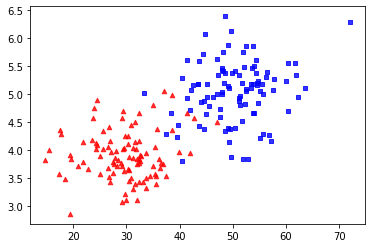

In [57]:
x1 = np.random.normal(50, 6, 100)  # np.random.normal(mu,sigma,size))
y1 = np.random.normal(5, 0.5, 100)

x2 = np.random.normal(30,6,100)
y2 = np.random.normal(4,0.5,100)
plt.scatter(x1,y1,c='b',marker='s',s=20,alpha=0.8)
plt.scatter(x2,y2,c='r', marker='^', s=20, alpha=0.8)

print(np.sum(x1)/len(x1))
print(np.sum(x2)/len(x2))

In [58]:
x_val = np.concatenate((x1,x2))
y_val = np.concatenate((y1,y2))

x_val.shape

(200,)

In [59]:
def minmax_norm(X):
    return (X - X.min(axis=0)) / ((X.max(axis=0) - X.min(axis=0)))

In [60]:
minmax_norm(x_val[:10])

array([0.50644156, 0.81131417, 0.83351914, 0.02712171, 0.02055954,
       0.        , 0.57709462, 0.77966129, 0.96620335, 1.        ])

In [61]:
from sklearn.preprocessing import MinMaxScaler
# 將維度從1D轉成2D
x_val=x_val.reshape(-1, 1)
scaler = MinMaxScaler().fit(x_val)  # default range 0~1
print(scaler.data_max_)
print(scaler.transform(x_val)[:10])

[72.02116846]
[[0.63483486]
 [0.70005435]
 [0.70480452]
 [0.53229695]
 [0.53089314]
 [0.52649497]
 [0.64994922]
 [0.69328305]
 [0.73318883]
 [0.74041874]]


In [62]:
print(scaler.data_min_)

[14.76855087]
